<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* sql-pandas
* pandas functions
* np
* regression

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date, time, timedelta, timezone
from dateutil.relativedelta import relativedelta


# sql - pandas

In [28]:
d1 = pd.DataFrame({'name': ['Ann', 'Ann', 'Ann', 'Bob', 'Bob'],
                   'destination': ['Japan', 'Korea', 'Switzerland',
                                   'USA', 'Switzerland'],
                   'dep_date': ['2019-02-02', '2019-01-01',
                                '2020-01-11', '2019-05-05',
                                '2020-01-11'],
                   'duration': [7, 21, 14, 10, 14]})
d1

,name,destination,dep_date,duration
0,Ann,Japan,2019-02-02,7
1,Ann,Korea,2019-01-01,21
2,Ann,Switzerland,2020-01-11,14
3,Bob,USA,2019-05-05,10
4,Bob,Switzerland,2020-01-11,14


In [29]:
d1.dep_date = pd.to_datetime(d1.dep_date)
d1.duration = d1.duration.to_numpy().astype('timedelta64[D]')
#d1.duration = pd.to_timedelta(d1.duration)
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   name         5 non-null      object         
 1   destination  5 non-null      object         
 2   dep_date     5 non-null      datetime64[ns] 
 3   duration     5 non-null      timedelta64[ns]
dtypes: datetime64[ns](1), object(2), timedelta64[ns](1)
memory usage: 288.0+ bytes


```
SELECT name
     , destination
     , dep_date
     , duration
     , row_number() over() as nums
     , rank() over(partition by name order by dep_date) as num_rank
     , datename(month, dep_date) as month_name
     , datename(day, dep_date) as day_name
     , dense_rank() over(partition by name order by dep_date) as num_rank
     , dateadd(day, dep_date, duration) as arr_date
     , lead(dep_date) over(partition by name order by dep_date) as next_date
     , datediff(day, dep_Date, lead(dep_date) over(partition by name order by dep_date)) as date_diff
     , avg(duration *1.0) over(partition by name) as avg_dur
     , sum(duration) over(partition by name order by dep_date range between unbounded preceeding and current row) as cumsum
FROM d1

```

In [42]:
d1.assign(num = d1.duration.rank(method = 'first').astype(int),
          num_rank = d1.duration.rank(method = 'min').astype(int),
          num_dense = d1.duration.rank(method = 'dense').astype(int),
          month_name = d1.dep_date.dt.month_name(),
          day_name = d1.dep_date.dt.day_name(),
          arr_date = d1.dep_date + d1.duration,
          next_date = d1.groupby('name')['dep_date'].transform(lambda x : x.shift(-1)),
          date_diff = d1.groupby('name')['dep_date'].transform(lambda x: x - x.shift(-1)),
          avg_dur = d1.groupby('name')['duration'].transform(lambda x : x.mean()),
          cumsum = d1.groupby('name')['duration'].transform(lambda x : x.cumsum())
          )

,name,destination,dep_date,duration,num,num_rank,num_dense,month_name,day_name,arr_date,next_date,date_diff,avg_dur,cumsum
0,Ann,Japan,2019-02-02,7 days,1,1,1,February,Saturday,2019-02-09,2019-01-01,32 days,14 days,7 days
1,Ann,Korea,2019-01-01,21 days,5,5,4,January,Tuesday,2019-01-22,2020-01-11,-375 days,14 days,28 days
2,Ann,Switzerland,2020-01-11,14 days,3,3,3,January,Saturday,2020-01-25,NaT,NaT,14 days,42 days
3,Bob,USA,2019-05-05,10 days,2,2,2,May,Sunday,2019-05-15,2020-01-11,-251 days,12 days,10 days
4,Bob,Switzerland,2020-01-11,14 days,4,3,3,January,Saturday,2020-01-25,NaT,NaT,12 days,24 days


# pandas functions

In [44]:
list_file = [f'players_{a:02d}.csv' for a in range(15,22)]
d2 = pd.concat(map(pd.read_csv, list_file))
d2.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27.0,1987-06-24,169.0,67.0,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29.0,1985-02-05,185.0,80.0,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30.0,1984-01-23,180.0,80.0,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32.0,1981-10-03,195.0,95.0,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28.0,1986-03-27,193.0,92.0,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [48]:
top_nans = pd.DataFrame(d2.isna().sum()[d2.isna().sum() != 0], columns = ['nans']).nlargest(3, 'nans')
top_nans

,nans
loaned_from,106714
nation_position,106026
nation_jersey_number,106026


In [51]:
d2[top_nans.index].fillna(d2.mode().iloc[0,0]).head()

,loaned_from,nation_position,nation_jersey_number
0,41.0,CF,10.0
1,41.0,LW,7.0
2,41.0,RS,11.0
3,41.0,ST,10.0
4,41.0,GK,1.0


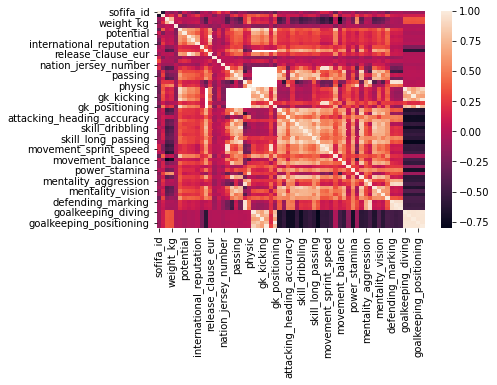

In [52]:
sns.heatmap(d2.corr())

In [60]:
d3 = pd.read_csv('pivot.csv')
d3 = d3.assign(month = d3.month.to_numpy().astype('datetime64[M]') )
d3.head()

,month,state,permit
0,2020-04-01,Alabama,21276.0
1,2020-04-01,Alaska,85.0
2,2020-04-01,California,24460.0
3,2020-04-01,Massachusetts,5074.0
4,2020-04-01,North Dakota,280.0


In [62]:
pv = pd.pivot_table(d3, index = 'state', columns = 'month', values = 'permit')
pv

month,2020-01-01,2020-02-01,2020-03-01,2020-04-01
state,,,,
Alabama,37140.0,29633.0,31205.0,21276.0
Alaska,223.0,139.0,143.0,85.0
California,34694.0,32002.0,27792.0,24460.0
Massachusetts,9289.0,9173.0,NaN,5074.0
North Dakota,370.0,396.0,587.0,280.0


In [66]:
pv.columns = pv.columns.astype(str)
pv.columns

Index(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'], dtype='object', name='month')

In [68]:
pv = pv.reset_index()
pv

month,state,2020-01-01,2020-02-01,2020-03-01,2020-04-01
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [69]:
pv.columns.name = None
pv

,state,2020-01-01,2020-02-01,2020-03-01,2020-04-01
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [71]:
pv = pd.melt(pv, id_vars = 'state', var_name = 'month', value_name = 'permit')
pv.head()

,state,month,permit
0,Alabama,2020-01-01,37140.0
1,Alaska,2020-01-01,223.0
2,California,2020-01-01,34694.0
3,Massachusetts,2020-01-01,9289.0
4,North Dakota,2020-01-01,370.0


In [75]:
pv = pv[d3.columns]
pv.month = pv.month.to_numpy().astype('datetime64[D]')
pv.head()

,month,state,permit
0,2020-01-01,Alabama,37140.0
1,2020-01-01,Alaska,223.0
2,2020-01-01,California,34694.0
3,2020-01-01,Massachusetts,9289.0
4,2020-01-01,North Dakota,370.0


In [77]:
pv.assign(month = pv.month.dt.floor('D')).head()

,month,state,permit
0,2020-01-01,Alabama,37140.0
1,2020-01-01,Alaska,223.0
2,2020-01-01,California,34694.0
3,2020-01-01,Massachusetts,9289.0
4,2020-01-01,North Dakota,370.0


# np

In [81]:
ds = np.random.randint(0, 101, 200)
cond = [ds >= 90, ds >= 50, ds >= 0]
labs = list('ABC')
d5 = pd.DataFrame({'score' : ds, 'class' : np.select(cond, labs)})
d5.head()

,score,class
0,19,C
1,39,C
2,87,B
3,85,B
4,29,C


In [82]:
d6  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d6.purchase_date = pd.to_datetime(d6.purchase_date)
d6

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [83]:
d6.assign(purchase_date = d6.purchase_date.to_numpy().astype('datetime64[D]'))

,user_id,purchase_date
0,1,2015-01-23
1,2,2015-02-05
2,3,2015-02-18
3,4,2015-03-21
4,5,2015-03-11
5,6,2015-03-03


In [86]:
d6.assign(purchase_date = d6.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())

,user_id,purchase_date
0,1,2015-01-01
1,2,2015-02-01
2,3,2015-02-01
3,4,2015-03-01
4,5,2015-03-01
5,6,2015-03-01


In [88]:
d6.assign(purchase_date = d6.purchase_date.dt.to_period("M").dt.to_timestamp())

,user_id,purchase_date
0,1,2015-01-01
1,2,2015-02-01
2,3,2015-02-01
3,4,2015-03-01
4,5,2015-03-01
5,6,2015-03-01


# regression

In [89]:
d7 = pd.read_csv('heights.csv')
d7.head()

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [95]:
x = d7.height.values.reshape(-1,1)
y = d7.weight

In [100]:
fit_lm = LinearRegression().fit(x, y)

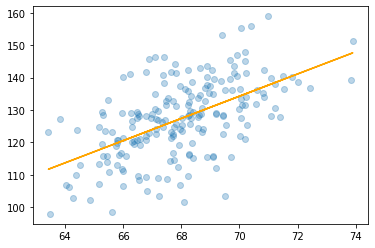

In [102]:
plt.plot(x, y, 'o', alpha = 0.3)
plt.plot(x, fit_lm.predict(x), color = 'orange')

In [103]:
fit_lm.score(x, y)

0.31009833265482645

In [104]:
d8 = pd.read_csv('manhattan.csv')
d8.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [106]:
x = d8[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio']]
y = d8['rent']

In [108]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = 0.7)

In [111]:
fit_lm = LinearRegression().fit(x_tr, y_tr)

In [112]:
pred = fit_lm.predict(x_te)

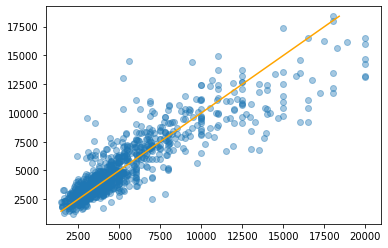

In [131]:
plt.plot(y_te, pred, 'o', alpha = .4)
plt.plot([np.min(y_te), np.max(pred)], [np.min(y_te), np.max(pred)], color = 'orange')

In [132]:
fit_lm.score(x_te, y_te)

0.7920875478507627